## Hypothesis Testing

Hypothesis testing is an important part of statistics and data analysis. Most of the time it is practically not possible to take data from a total population. In that case, we take a sample and make estimations or claims about the total population. These assumptions or claims are hypotheses. Hypothesis testing is the process to test if there is evidence to reject that hypothesis.

https://towardsdatascience.com/a-complete-guide-to-hypothesis-testing-for-data-scientists-using-python-69f670e6779e

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats.distributions as dist

cp - chest pain type

trestbps - restring blood pressure

chol - serum cholestoral in mg/dl

fbs - (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)

restecg - resting electrocardiographic results

thalac - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment

ca - number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [2]:
df = pd.read_csv('./data/heart2.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


The last column of the dataset is ‘target’. That is if the person has heart disease. The research question for this section is,

#### “The population proportion of Ireland having heart disease is 42%. Are more people suffering from heart disease in the US”?

#### Step 1 
Define the null hypothesis and alternative hypothesis.
In this problem, the null hypothesis is the population proportion having heart disease in the US is less than or equal to 42%. But if we test for equal to less than will be covered automatically. So, I am making it only equal to.
And the alternative hypothesis is the population proportion of the US having heart disease is more than 42%.

Ho: p0 = 0.42  #null hypothesis Ho

Ha: p > 0.42  #alternative hypothesis Ha

#### Step 2
Assume that the dataset above is a representative sample from the population of the US. So, calculate the population proportion of the US having heart disease.

In [28]:
p_us = len(df[df['target']==1])/len(df)
p_us

0.5131707317073171

The population proportion of the sample having heart disease is 0.51 or 51%. This percentage is more than the null hypothesis. That is 42%.

But the question is if it is significantly more than 42%. If we take a different simple random sample, the currently observed population proportion (51%) can be different.

To find out if the observed population proportion is significantly more than the null hypothesis, perform a hypothesis test.

#### Step 3
Calculate the Test Statistic:


test_statistics = (Best_Estimate - Hypothesized_Estimate)/Standard_error_of_estimate

SE = sqrt((p0*(1-p0))/n)

In this formula, p0 is 0.42 (according to the null hypothesis) and n is the size of the sample population. 

In [29]:
se = np.sqrt(0.42 * (1-0.42) / len(df))

In [30]:
#Best estimate
be = p_us  #hypothesized estimate
he = 0.49
test_stat = (be - he)/se
test_stat

1.5030140463472605

The test statistics came out to be 1.5030.


#### Step 4
    
Calculate the p-value


This test statistic is also called z-score. You can find the p-value from a z_table or you can find the p-value from this formula in python.

In [31]:
pvalue = 2*dist.norm.cdf(-np.abs(test_stat))
pvalue

0.1328354218859503

The p-value is 0.1328. It means the sample population proportion (51% or 0.51) is 0.1328 null standard errors above the null hypothesis.

#### Step 5 
Infer the conclusion from the p-value


Consider the significance level alpha to be 5% or 0.05. A significance level of 5% or less means that there is a probability of 95% or greater that the results are not random.

#### Here p-value is bigger than our considered significance level of 0.05. So, we cannot reject the null hypothesis. That means there is no significant difference in population proportion having heart disease in Ireland and the US.

### Hypothesis Tests for the Difference in Two Proportions

Comparative tests are conducted much more frequently than one population proportion hypothesis test. A two-sample test of proportions is performed to assess if the population proportion of some traits differs between two subgroups.


Here, we are going to test if the population proportion of females with heart disease is different from the population proportion of males with heart disease.

#### Step 1 
Set up the null hypothesis, alternative hypothesis, and significance level.

Here, we want to check if there is any difference between the population proportion of males and females having heart disease. We will start with the assumption that there is no difference.

Ho: p1 -p2 = 0

This is our null hypothesis. Here, p1 is the population proportion of females with heart disease and p2 is the population proportion of males having heart disease.

What could be the alternative hypothesis?
The alternative hypothesis can be, there is a difference.

Ha: p1 - p2 != 0

#### Step 2 

Prepare a chart that shows the population proportion of males and females with heart disease and the total male and female population.


In [34]:
df['Gender'] = df.sex.replace({1: "Male", 0: "Female"})
p = df.groupby("Gender")['target'].agg([lambda z: np.mean(z==1), "size"])
p.columns = ["HeartDisease", 'Total']
p

,HeartDisease,Total
Gender,,
Female,0.724359,312
Male,0.420757,713


#### Step 3
Calculate the test statistic
We will use the same formula for the test statistic as before. The best estimate is p1 — p2. Here, p1 is the population proportion of females with heart disease and p2 is the population proportion of males with heart disease.


In [37]:
#Best estimate is p1 - p2. Get p1 and p2 from the chart p above
p_fe = p.HeartDisease.Female
p_male = p.HeartDisease.Male

The standard error for two population proportion is calculated with the formula below:

SE = sqrt(p(1-p)*((1/n2) + (1/n2)))

Here, p is the total population proportion in the sample with heart disease. n1 and n2 are the total numbers of the female and male populations in the sample.


In [38]:
n1 = p.Total.Female
n2 = p.Total.Male
se = np.sqrt(p_us*(1-p_us)*(1/n1 + 1/n2))
se

0.03392806959170294

In [39]:
#calculate the best estimate
be = p_fe - p_male  

#Calculate the hypothesized estimate
#Our null hypothesis is p1 - p2 = 0
he = 0  

#Calculate the test statistic
test_statistic = (be - he)/se
test_statistic

8.948390366994612

The calculated test_statistic is 8.9483. That means that the observed difference in sample proportions is 8.9483 estimated standard error below the hypothesized value.


#### Step 4
Calculate the p-value


In [40]:
pvalue = 2*dist.norm.cdf(-np.abs(test_statistic))
pvalue

3.607034554789343e-19

The p-value is 3.60e-19. That means more than 0% of the time we would see that the results we observed are true considering the null hypothesis is true.
In another way, the p-value is smaller than the significance level (0.1). So, we have enough evidence to reject the null hypothesis.
The population proportion of males with heart disease is significantly different than the population proportion of females with heart disease.


### Hypothesis Testing for One Mean

This is a simple hypothesis testing process. We can perform this test if we have a specific fixed mean value to compare. Let’s work on an example to understand the process.

This is the research question:
#### “Check if the mean trestbps is great than 135”. 

Here, trestbps is resting blood pressure. We have a trestbps column in the DataFrame. Let’s solve this problem step by step.

#### Step 1:

State the hypothesis
We need to find out if the mean trestbps is greater than 135. Let’s assume that the mean trestbps is less than or equal to 135.
So, the null hypothesis can be that the mean trestbps is 135. Because if we can prove that the mean trestbps is greater than 135, it is automatically greater than 134 or 130.
If we find enough evidence to reject the null hypothesis, we can accept that the mean trestbps is greater than 135. This is the alternative hypothesis for this example.

Ho: mu = 135

Ha: mu > 135



/Users/rafaelbaetacarreira/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trestbps', ylabel='Density'>

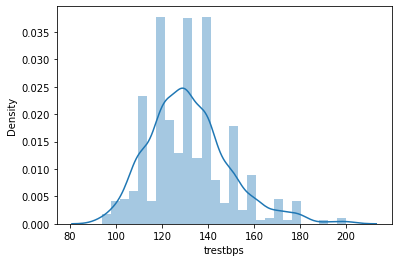

In [41]:
sns.distplot(df.trestbps)


The distribution is not exactly normal. But it is close to normal.
The good news is, we do not need to worry about the normality of the data. Because we have a large enough sample size(more than 25 data).

#### Step 3
Calculate the test statistic

Here is the formula to calculate the test statistic:
    
(Best_Estimate - Hypothesized_Estimate)/Standard_Error_Of_Estimate

First, calculate the standard error using the formula below:

SE = s/sqrt(n)

Here, S is the sample standard deviation and n is the number of samples.


In [42]:
std= df.trestbps.std()
n = len(df)
se = std/np.sqrt(n)
se

0.5471303493683027

Now, use this standard error to find the test statistic:


In [43]:
#Best estimate
be = df.trestbps.mean() #Hypothesized estimatehe = 135
test_statistic = (be - he)/se
test_statistic

240.5490893879811

Test statistic came out to be 240.54. 

Look at the formula for test statistics. On top, it measures the distance between the original mean and hypothesized mean. And the bottom is the standard error.

So, this test_statistic means, the sample mean is 240.53 standard error above the hypothesized mean.

#### Step 4
Infer the conclusion from the test statistic
Convert this test_statistic to a probability value to see if this difference is unusual or not. We can get the value using this python formula:


In [44]:
pvalue = 2*dist.norm.cdf(-np.abs(test_statistic))
pvalue

0.0

The p-value is 0.0 which is less than the significance level (0.05).
#### So, we can reject the null hypothesis.

There is only 0% probability that we will see the observed result is true when the null hypothesis is true. 0% probability is too low.

So, we reject the null hypothesis and accept the alternative hypothesis based on this sample data.

### Hypothesis Testing for the Difference in Mean
For this example, we will use the same data, the trestbps column. But this time to test if there is any difference between the mean trestbps of females to the mean trestbps of males.
#### Step 1
State the hypothesis
As a null hypothesis, start with the claim that the mean trestbps of females and the mean trestbps of males are the same. So the difference between these two means will be zero.
The alternative hypothesis is, these two means are not the same. Let’s perform the test with a 10% significance level.

Ho: mu_female - mu_male = 0

Ha: mu_female - mu_male != 0

Both the male and female populations have large enough data in this data. So, checking for the normality of the data is not required.

#### Step 2 

Calculate the test statistic

The formula for the test statistic is the same as before. But the formula for the standard error is different.

SE = sqrt((s1^2/n1)+(s2ˆ2/n2))

Here s1 and s2 are the sample standard deviation of the female and male population respectively. n1 and n2 are the sample size of the female and male population. Now, calculate the standard error:


In [47]:
pop_fe = df[df.Gender=='Female'].dropna()
pop_male = df[df.Gender=='Male'].dropna()
std_fe = pop_fe.trestbps.std()
std_male = pop_male.trestbps.std()
se = np.sqrt(std_fe**2/len(pop_fe) + std_male**2/len(pop_male))
se

1.268514364020195

Use the standard error to get the test statistic.


In [52]:
#calculate the best estimate
mu_fe = pop_fe.trestbps.mean()     #Mean trestbps for females
mu_male = pop_male.trestbps.mean()  #Mean trestbps for males

#mu_diff = mu_fe - mu_male    
be = mu_fe - mu_male
print(be)
#hypothesized estimate 
mu_diff_hyp = 0   #null hypothesis: difference of two mean = 
he = mu_diff_hyp
test_statistic = (be-he)/se
test_statistic


3.0048683784658294


2.3688091074844078

The test_statistic is 2.368. For the information, the observed difference in mean ‘mu_diff’ is 3.004.
As we are testing if the mean is different from each other, this is a two-tailed test.
The p-value is the probability that the test statistic is either less than 2.368 or greater than 2.368.


#### Step 3: Infer the conclusions from the test statistic

Calculate the p-value from this test statistic in python:

In [54]:
pvalue = 2*dist.norm.cdf(-np.abs(test_statistic))
pvalue

0.01784546138523886

The p-values came out to be 0.017. As this is a two-tailed test,

p(z < -2.36) = 0.017

p(z > 2.36) = 0.017

p-value = 0.017+0.017 = 0.034

That means, there is approximately 0.034% probability that the observed result or more extreme is true when the null hypothesis is true.

In another way, the p-value is much lower than the significance level. So, we success to reject the null hypothesis.

#### The final inference is, based on the observed difference between the mean trestbps of females and the mean trestbps of males, we support the idea that there is a significant difference between the two means.